In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_excel('users_ad.xlsx')

In [3]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35382 entries, 0 to 35381
Data columns (total 61 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         35382 non-null  int64         
 1   sign_in_count              35382 non-null  int64         
 2   current_sign_in_at         27883 non-null  datetime64[ns]
 3   last_sign_in_at            27921 non-null  datetime64[ns]
 4   current_sign_in_ip         27883 non-null  object        
 5   last_sign_in_ip            27883 non-null  object        
 6   created_at                 35382 non-null  datetime64[ns]
 7   updated_at                 35382 non-null  datetime64[ns]
 8   bank_id                    12790 non-null  float64       
 9   birth                      12818 non-null  object        
 10  address_zipcode            12939 non-null  object        
 11  address_street             12938 non-null  object        
 12  addr

### Excluindo as colunas com menos de 1000 valores não-nulos

In [4]:
nro_min_nao_nulos = 1000
df_raw_ = raw_df.loc[:, (raw_df.notnull().sum(axis=0) >= nro_min_nao_nulos)]

In [5]:
# Checando se há alguma linha duplicada
df_raw_.duplicated().values.any()

False

In [6]:
df_raw_.head()

,id,sign_in_count,current_sign_in_at,last_sign_in_at,current_sign_in_ip,last_sign_in_ip,created_at,updated_at,bank_id,birth,...,signer_key,news_subscription,newcaption_subscription,myowncaption_subscription,available_to,qualified_investor,failed_attempts,nationality,admin,moderator
0,7,1,2020-11-05 14:30:57.357459,2020-11-05 14:30:57.357459,201.21.202.21,201.21.202.21,2018-07-09 09:21:17,2020-11-05 14:33:27.593429,1985.0,1989-10-22 00:00:00,...,fa9a42c7-0a9f-4234-9c74-72435f15c1e2,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,8,0,NaT,NaT,NaN,NaN,2018-07-09 09:50:12,2019-06-10 14:59:19.281938,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,9,705,2022-04-13 17:15:32.596296,2022-04-12 16:40:34.216226,189.112.72.147,179.175.190.39,2018-07-12 16:33:46,2022-04-13 17:15:32.598869,2102.0,1982-05-27 00:00:00,...,d3f38a2d-ec99-486b-a6f9-eae48d45cdb3,1.0,1.0,1.0,0.0,0.0,0,NaN,0.0,0.0
3,10,0,NaT,NaT,NaN,NaN,2018-07-12 16:32:52,2019-06-10 14:59:19.316317,NaN,1977-07-14 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,11,0,NaT,2018-08-18 17:20:37.000001,NaN,NaN,2018-08-16 14:41:44,2022-01-25 16:46:09.047434,2031.0,1978-02-16 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


### Nacionalidade brasileira escrita de muitas maneiras diferentes. Difícil de entender qual o valor real

In [7]:
df_raw_['nationality'].value_counts()

Brasileiro     1453
Brasileira      814
brasileiro      230
Brasileiro      191
brasileira      180
               ... 
Brasilieira       1
espanhola         1
Brasileirra       1
Brasilieiro       1
Brazileira        1
Name: nationality, Length: 98, dtype: int64

In [8]:
df_raw_["nationality"] = df_raw_.apply(lambda x: 'BR' if type(x['nationality']) == str and x['nationality'].lower().startswith('br') else x["nationality"], axis=1)

In [9]:
df_raw_['nationality'].value_counts()

BR                     3330
Francesa                  3
Argentina                 2
Basileiro                 2
Espanhola                 2
italia                    2
PRESIDENTE PRUDENTE       1
Uruguaia                  1
Barsileiro                1
Portuguesa                1
Sulbrasileira             1
Haitiano                  1
Rio de janeiro            1
argentino                 1
Videira SC                1
Peruana                   1
Maranhão                  1
EUA                       1
chinesa                   1
Novo Hamburgo             1
COLOMBIA                  1
Portugal                  1
L                         1
Aleman                    1
Auriflama                 1
Paulista                  1
Argentino                 1
espanhola                 1
Portugues                 1
Colombia                  1
Barsileira                1
Alemão                    1
A                         1
Araxá                     1
Santa Catarina            1
Rio de Janeiro      

#### Apesar de melhorar a nomenclatura, ainda assim, muitas nomenclaturas erradas. Essa parece ser uma coluna que não vai agregar muito na análise e deverá ser retirada. Outras colunas com problemas similares também não serão utilizadas.

#### Aqui, vendo que não há linhas duplicadas, partiremos do princípio de que cada linha de fato representa um usuário diferente. Colunas que diferenciariam unicamente as linhas contém apenas valores nulos, como a user_id, account_id e account_key, e por isso foram retiradas.

In [10]:
colunas_deletar = [0,1,2,3,4,5,7,8,10,11,12,13,16,18,19,20,21,22,25,27,30,31,32,34,35,36,40,42,43,44,45]

In [11]:
df = df_raw_.drop(df_raw_.columns[colunas_deletar],axis = 1)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35382 entries, 0 to 35381
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 35382 non-null  datetime64[ns]
 1   birth                      12818 non-null  object        
 2   address_neighborhood       12856 non-null  object        
 3   address_city               12939 non-null  object        
 4   address_state              12956 non-null  object        
 5   civil_status               13033 non-null  float64       
 6   occupation                 12725 non-null  object        
 7   job_title                  16546 non-null  object        
 8   person_type                33538 non-null  object        
 9   sex                        12678 non-null  float64       
 10  investor_profile           12016 non-null  float64       
 11  news_subscription          30421 non-null  float64       
 12  newc

In [13]:
df.head(3)

,created_at,birth,address_neighborhood,address_city,address_state,civil_status,occupation,job_title,person_type,sex,investor_profile,news_subscription,newcaption_subscription,myowncaption_subscription,qualified_investor
0,2018-07-09 09:21:17,1989-10-22 00:00:00,Humaitá,Porto Alegre,RS,0.0,123,123,pf,1.0,0.0,0.0,0.0,NaN,NaN
1,2018-07-09 09:50:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pf,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-12 16:33:46,1982-05-27 00:00:00,Cristal,Porto Alegre,RS,2.0,Administrador,NaN,pf,1.0,2.0,1.0,1.0,1.0,0.0


In [14]:
df = df.sort_values('created_at')

In [15]:
df.tail(2)

,created_at,birth,address_neighborhood,address_city,address_state,civil_status,occupation,job_title,person_type,sex,investor_profile,news_subscription,newcaption_subscription,myowncaption_subscription,qualified_investor
35380,2022-04-14 12:04:30.404069,NaN,NaN,NaN,NaN,NaN,NaN,Outros,pf,NaN,NaN,1.0,1.0,1.0,NaN
35381,2022-04-14 12:10:58.723122,1980-07-21 00:00:00,Paraíso,Cachoeiro de Itapemirim,ES,1.0,Vendedor,Outros,pf,1.0,0.0,1.0,1.0,1.0,1.0


In [16]:
# Filtrando para que a última data seja 31 de março
df = df[df['created_at'] < pd.to_datetime('2022-04-01')]

In [17]:
df.tail(2)

,created_at,birth,address_neighborhood,address_city,address_state,civil_status,occupation,job_title,person_type,sex,investor_profile,news_subscription,newcaption_subscription,myowncaption_subscription,qualified_investor
34720,2022-03-31 22:40:51.416743,1977-12-13 00:00:00,Vigilato Pereira,Uberlândia,MG,2.0,Professor,Outros,pf,1.0,0.0,1.0,1.0,1.0,0.0
34721,2022-03-31 23:08:36.481988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pf,NaN,NaN,1.0,1.0,1.0,NaN


### A INVESTIGAR:
#### 1. Idade
#### 2. Cidades e bairros
#### 3. Estado Civil
#### 4. Ocupação
#### 5. Gênero
#### 6. Perfil do Investidor
#### 7. Trajetória de cadastros no tempo

In [18]:
df['created_at'] = df['created_at'].dt.date

In [19]:
df['birth'] = pd.to_datetime(df['birth'], format='%Y-%m-%d', errors='coerce')

In [20]:
df['idade'] = (pd.to_datetime('today') - df['birth']).dt.days

In [21]:
df['idade'] = df['idade'] // 365.25

In [22]:
df_idade = df[df['idade'].notnull()]

In [23]:
df_idade['idade'] = df_idade['idade'].astype(int)

In [24]:
df_idade['idade'].sort_values()

26937      0
27872      0
28489      0
27524      0
28540      0
        ... 
17004    122
1849     122
31159    127
17224    135
15514    145
Name: idade, Length: 12651, dtype: int32

In [25]:
# Considerar apenas idades entre 18 e 90 anos.
df_idade = df_idade.loc[(df_idade['idade'] >= 18) & (df_idade['idade'] <= 90)]

In [26]:
grouped_idade = df_idade.groupby('idade', as_index=False)
idade_plot = grouped_idade.size()

In [27]:
grouped_idade.size()

,idade,size
0,18,21
1,19,37
2,20,86
3,21,154
4,22,176
...,...,...
61,80,4
62,82,2
63,83,1
64,86,3


In [28]:
idade_plot.rename(columns={'size':'Quantidade'}, inplace=True)

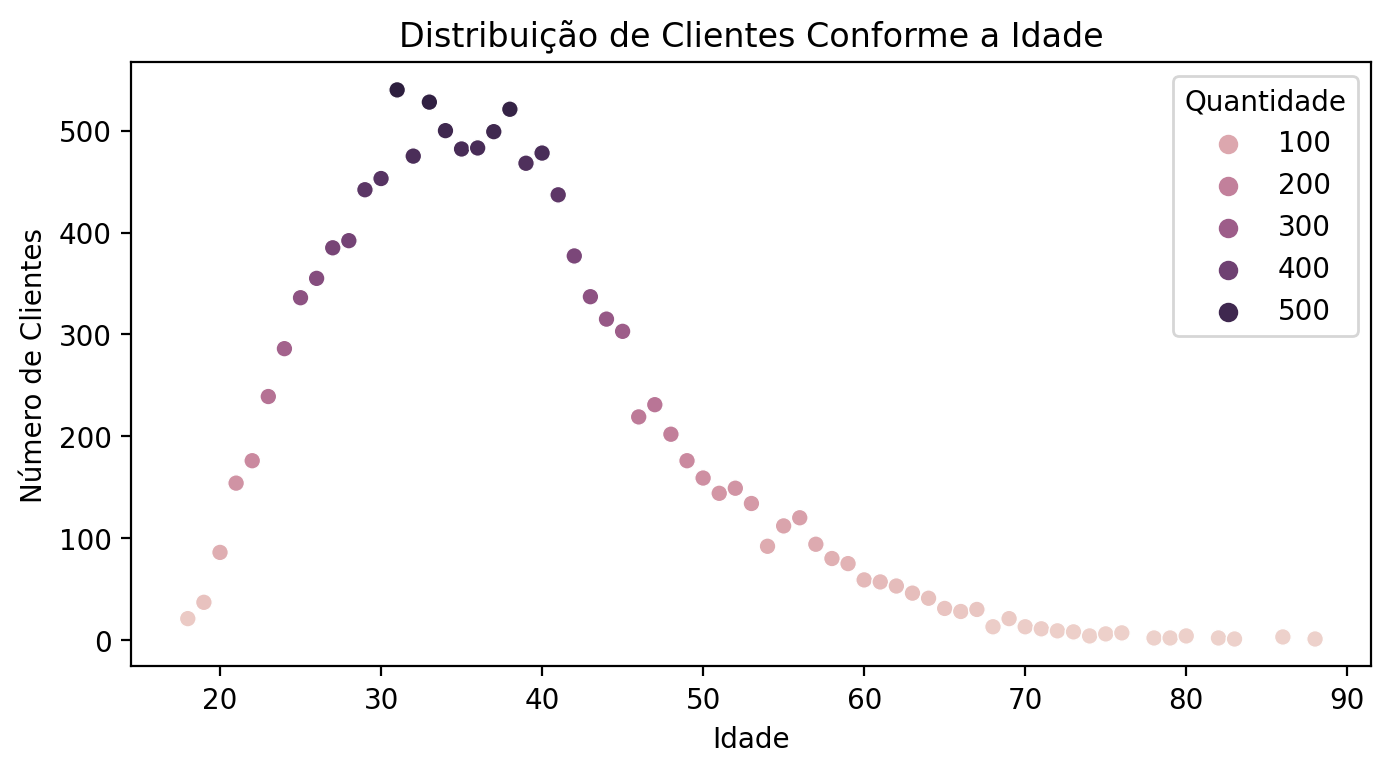

In [29]:
plt.figure(figsize=(8,4), dpi=200)
plt.xlabel('Idade')
plt.ylabel('Número de Clientes')
plt.title('Distribuição de Clientes Conforme a Idade')

sns.scatterplot(data=idade_plot, x='idade', y='Quantidade', hue='Quantidade')

plt.show()

In [30]:
# address_neighborhood 	address_city 	address_state
df_city_raw = df[['address_neighborhood', 'address_city','address_state']]

In [31]:
df_city_raw['address_city'].value_counts()

São Paulo                2435
Porto Alegre              943
Rio de Janeiro            781
Brasília                  421
Curitiba                  416
                         ... 
Glorinha                    1
São Leopolod                1
campos dos goytacazes       1
Salto Veloso                1
Marilândia                  1
Name: address_city, Length: 1386, dtype: int64

In [32]:
df_city_raw['address_city'].value_counts().nlargest(20)

São Paulo                2435
Porto Alegre              943
Rio de Janeiro            781
Brasília                  421
Curitiba                  416
Belo Horizonte            357
Campinas                  199
Florianópolis             188
Salvador                  158
Fortaleza                 151
Maceió                    119
Goiânia                   110
Recife                     98
São Bernardo do Campo      95
Niterói                    90
Santo André                90
São José dos Campos        83
Jundiaí                    81
Manaus                     80
Barueri                    79
Name: address_city, dtype: int64

In [33]:
city_dict = df_city_raw['address_city'].value_counts().nlargest(20).to_dict()

In [34]:
state_dict = df_city_raw['address_state'].value_counts()[:-3].to_dict()

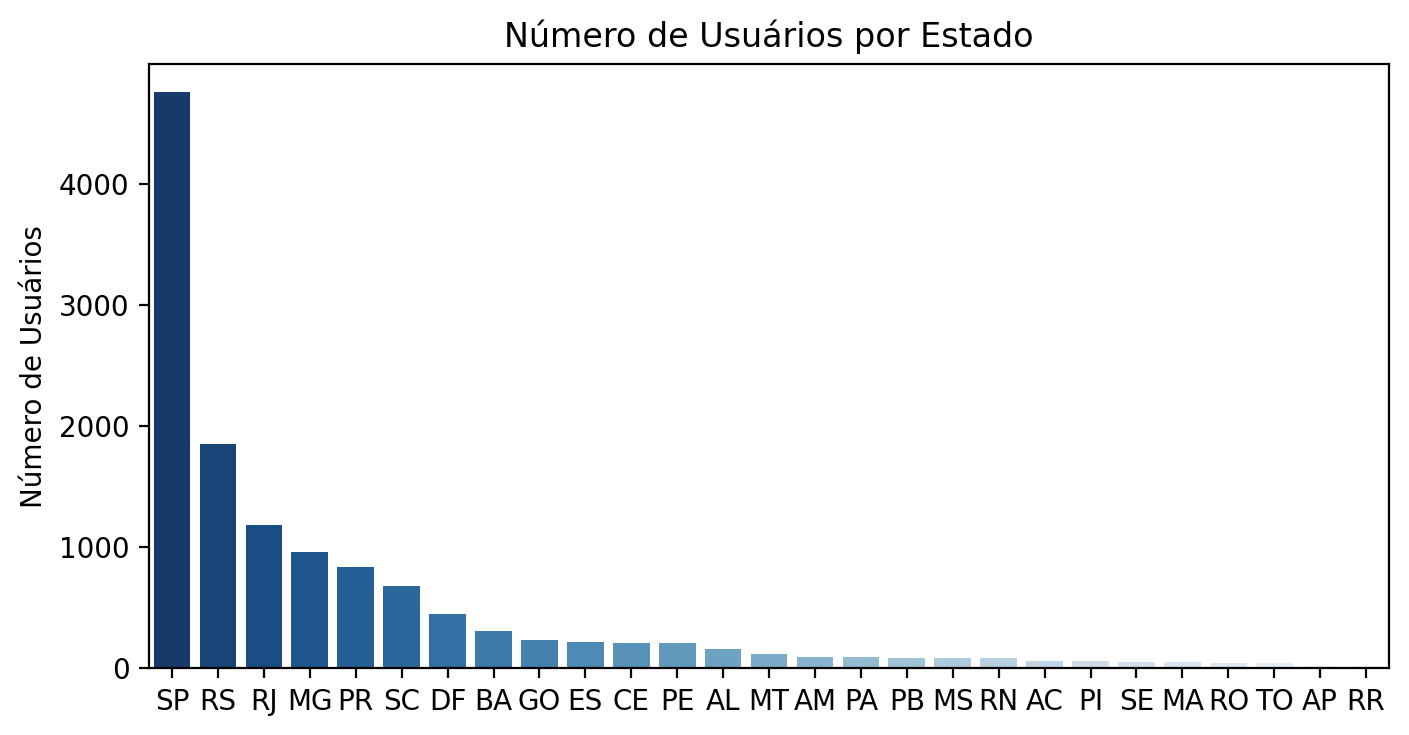

In [35]:
plt.figure(figsize=(8,4), dpi=200)
plt.ylabel('Número de Usuários')
plt.title('Número de Usuários por Estado')

dict_keys = list(state_dict.keys())
dict_values = list(state_dict.values())

sns.barplot(x=dict_keys, y=dict_values, palette='Blues_r')

plt.show()

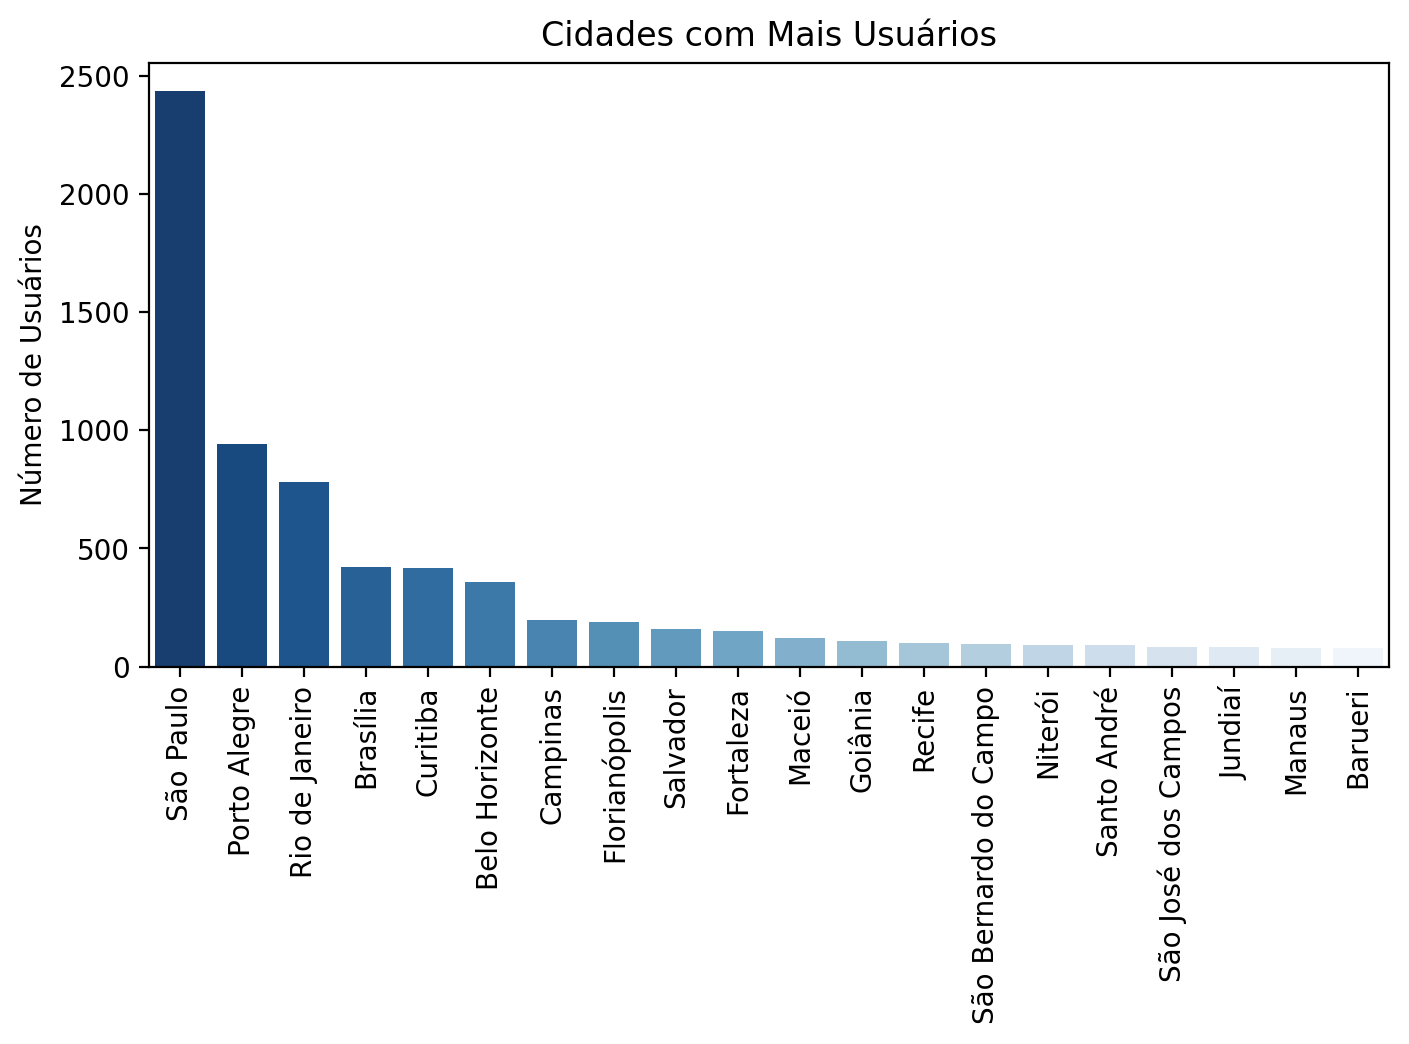

In [36]:
plt.figure(figsize=(8,4), dpi=200)
plt.ylabel('Número de Usuários')
plt.title('Cidades com Mais Usuários')

dict_keys = list(city_dict.keys())
dict_values = list(city_dict.values())

ax = sns.barplot(x=dict_keys, y=dict_values, palette='Blues_r')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

In [37]:
df_city_clean = df_city_raw[['address_city', 'address_neighborhood']].dropna()

In [38]:
grouped_city = df_city_clean.groupby('address_city', as_index=False)

In [39]:
poa_bairros = grouped_city.get_group('Porto Alegre')['address_neighborhood'].value_counts().nlargest(15).to_dict()

In [40]:
poa_bairros

{'Petrópolis': 81,
 'Auxiliadora': 45,
 'Centro Histórico': 40,
 'Rio Branco': 39,
 'Menino Deus': 35,
 'Bela Vista': 34,
 'Passo da Areia': 33,
 'Boa Vista': 28,
 'Partenon': 26,
 'Moinhos de Vento': 25,
 'Jardim do Salso': 23,
 'Floresta': 22,
 'Tristeza': 22,
 'São João': 21,
 'Três Figueiras': 21}

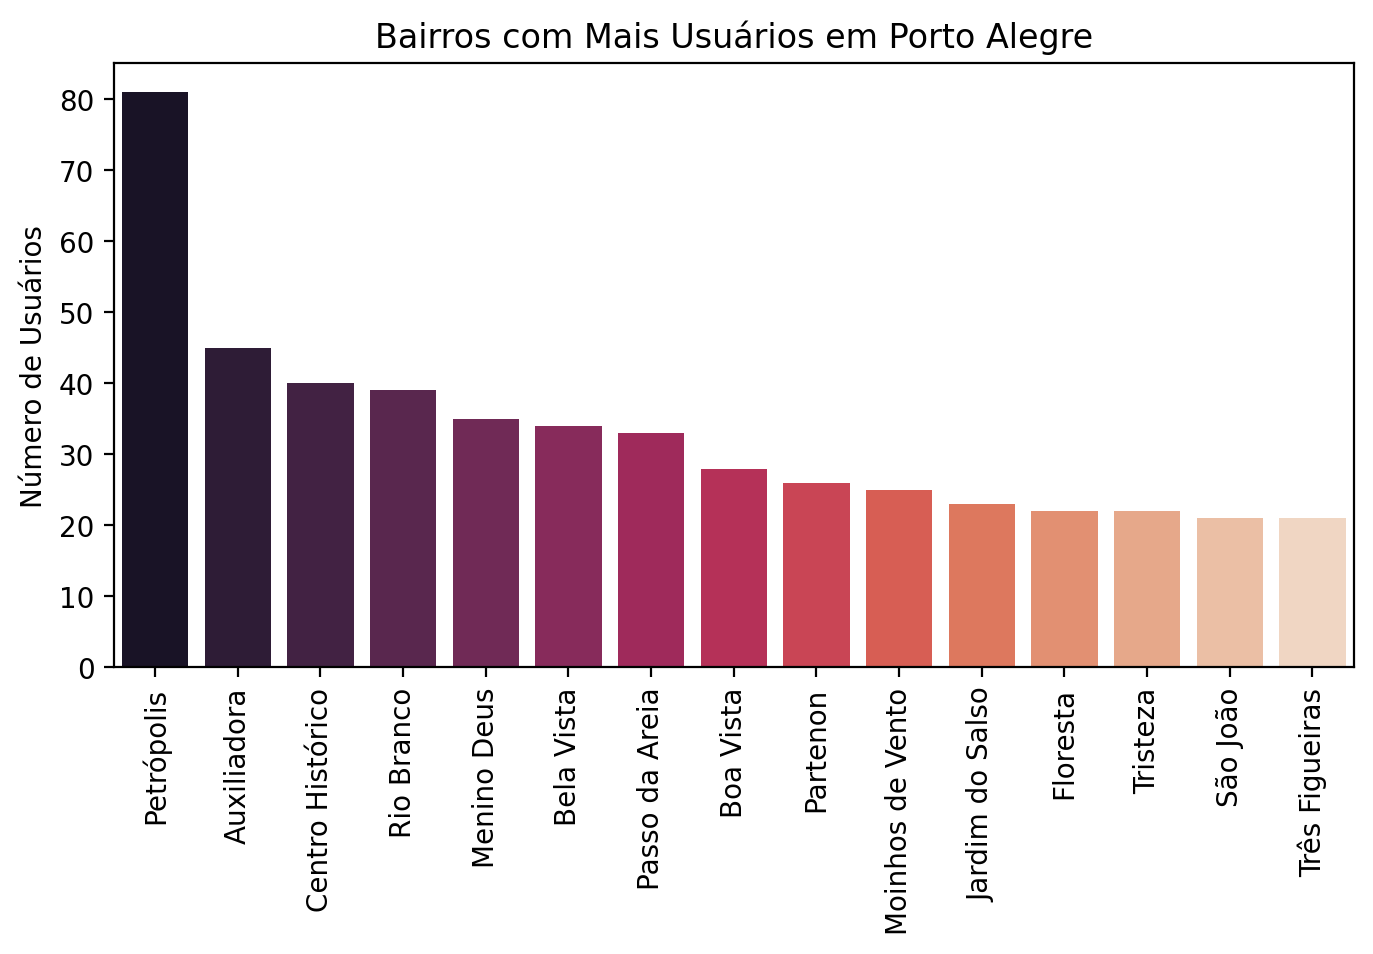

In [41]:
plt.figure(figsize=(8,4), dpi=200)
plt.ylabel('Número de Usuários')
plt.title('Bairros com Mais Usuários em Porto Alegre')

dict_keys = list(poa_bairros.keys())
dict_values = list(poa_bairros.values())

ax = sns.barplot(x=dict_keys, y=dict_values, palette='rocket')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

In [42]:
# Estado Civil
status_civil_dict = df['civil_status'].dropna().astype(int).astype(str).value_counts().to_dict()
status_civil_dict

{'0': 6601, '1': 5557, '2': 697, '3': 29}

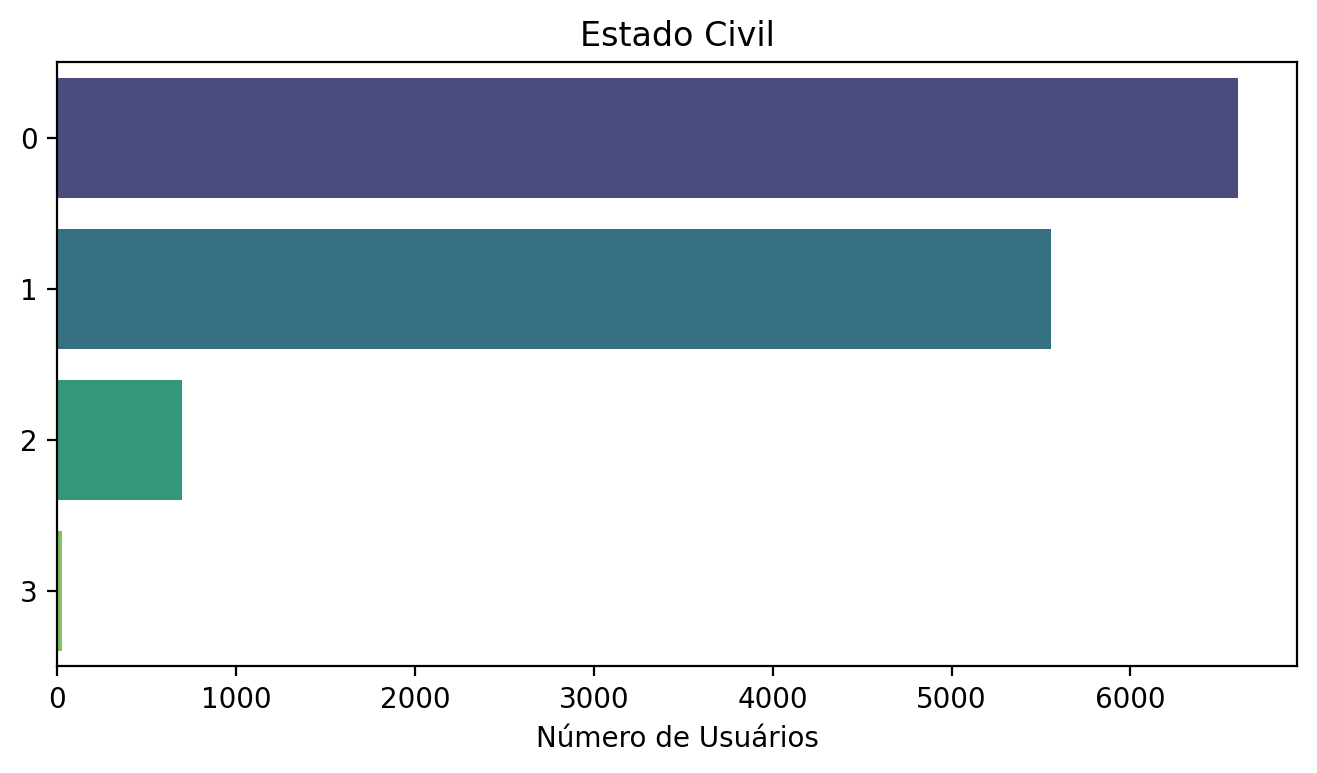

In [43]:
plt.figure(figsize=(8,4), dpi=200)
plt.xlabel('Número de Usuários')
plt.title('Estado Civil')

dict_keys = list(status_civil_dict.keys())
dict_values = list(status_civil_dict.values())

sns.barplot(x=dict_values, y=dict_keys, palette='viridis')
#sns.despine(left=True, bottom=True)
plt.show()

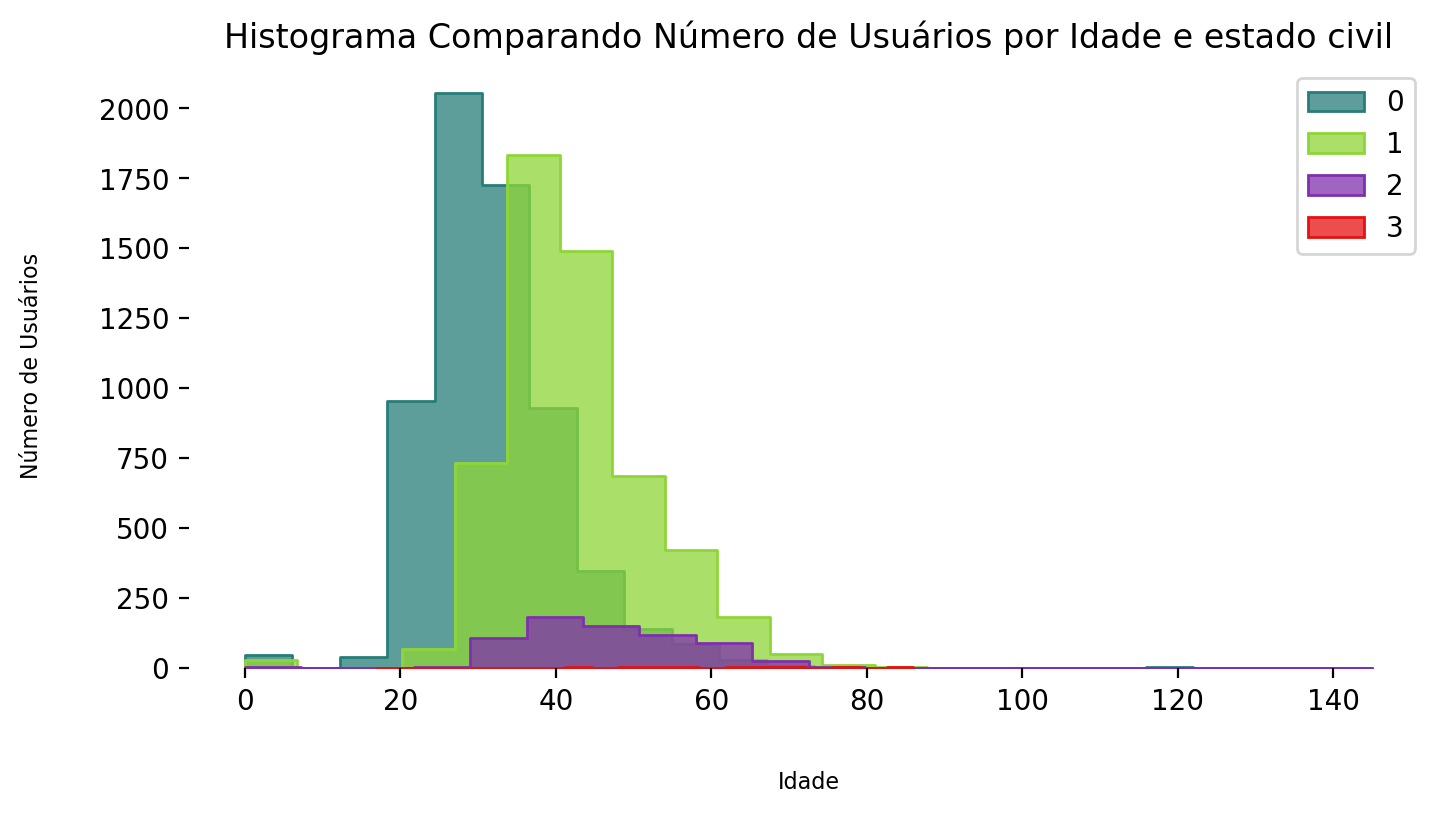

In [44]:
plt.figure(figsize=(8,4), dpi=200)

sns.histplot(df[df['civil_status'] == 0.0]['idade'], bins = 20, label = 0, element = 'step',
             color = '#277d79')

sns.histplot(df[df['civil_status'] == 1.0]['idade'], bins = 20, label = 1, element = 'step',
             color = '#8ed637')
sns.histplot(df[df['civil_status'] == 2.0]['idade'], bins = 20, label = 2, element = 'step',
             color = '#8030ad')
sns.histplot(df[df['civil_status'] == 3.0]['idade'], bins = 20, label = 3, element = 'step',
             color = '#e61111')
plt.title('Histograma Comparando Número de Usuários por Idade e estado civil')
sns.despine(bottom = True, left=True)
plt.xlabel('Idade', color = 'black', labelpad = 20, fontsize = 8)
plt.ylabel('Número de Usuários', color = 'black', labelpad = 20, fontsize = 8)
plt.legend()
plt.show()

In [45]:
occupation_dict = df['occupation'].str.strip().value_counts().nlargest(20).to_dict()
occupation_dict

{'Empresário': 919,
 'Administrador': 570,
 'Engenheiro': 495,
 'Advogado': 338,
 'Estudante': 332,
 'Empresario': 294,
 'Analista de Sistemas': 203,
 'Bancário': 180,
 'Economista': 164,
 'Autônomo': 155,
 'Servidor Público': 153,
 'Médico': 146,
 'Empreendedor': 121,
 'Consultor': 118,
 'Professor': 113,
 'Militar': 104,
 'Programador': 100,
 'Investidor': 98,
 'empresario': 93,
 'Contador': 85}

### As ocupações estão escritas de muitas maneiras diferentes. Alguns ajustes teriam de ser feitos na tabela para uma mensuração mais exata.

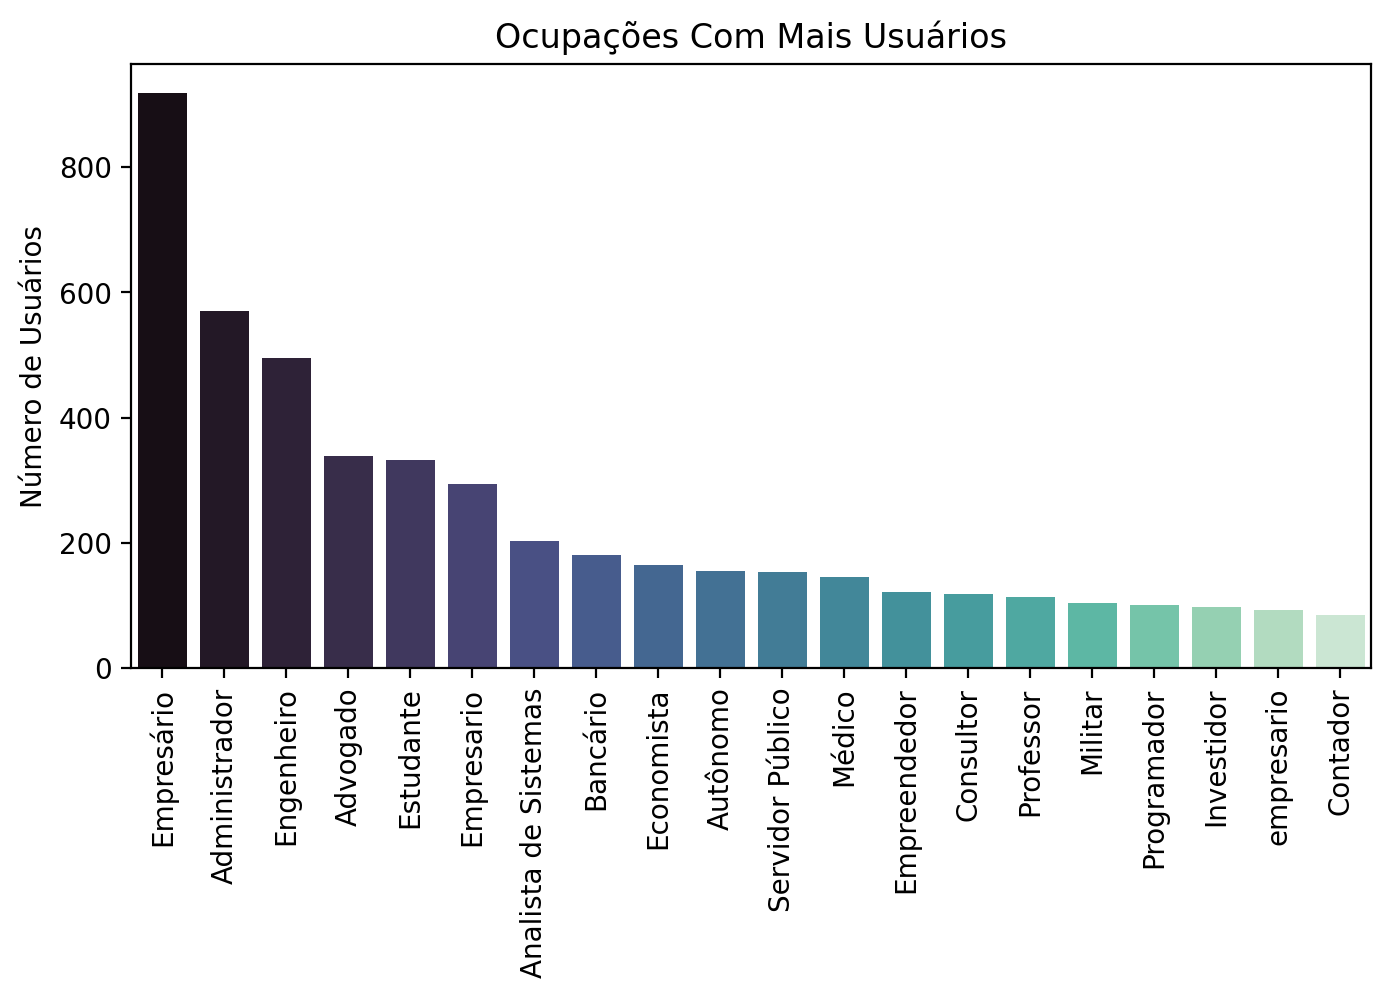

In [46]:
plt.figure(figsize=(8,4), dpi=200)
plt.ylabel('Número de Usuários')
plt.title('Ocupações Com Mais Usuários')

dict_keys = list(occupation_dict.keys())
dict_values = list(occupation_dict.values())

ax = sns.barplot(x=dict_keys, y=dict_values, palette='mako')

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

plt.show()

In [47]:
genero_dict = df['sex'].dropna().astype(int).astype(str).str.replace('1', 'Homem').str.replace('2', 'Mulher').value_counts().to_dict()
genero_dict

{'Homem': 11029, 'Mulher': 1507}

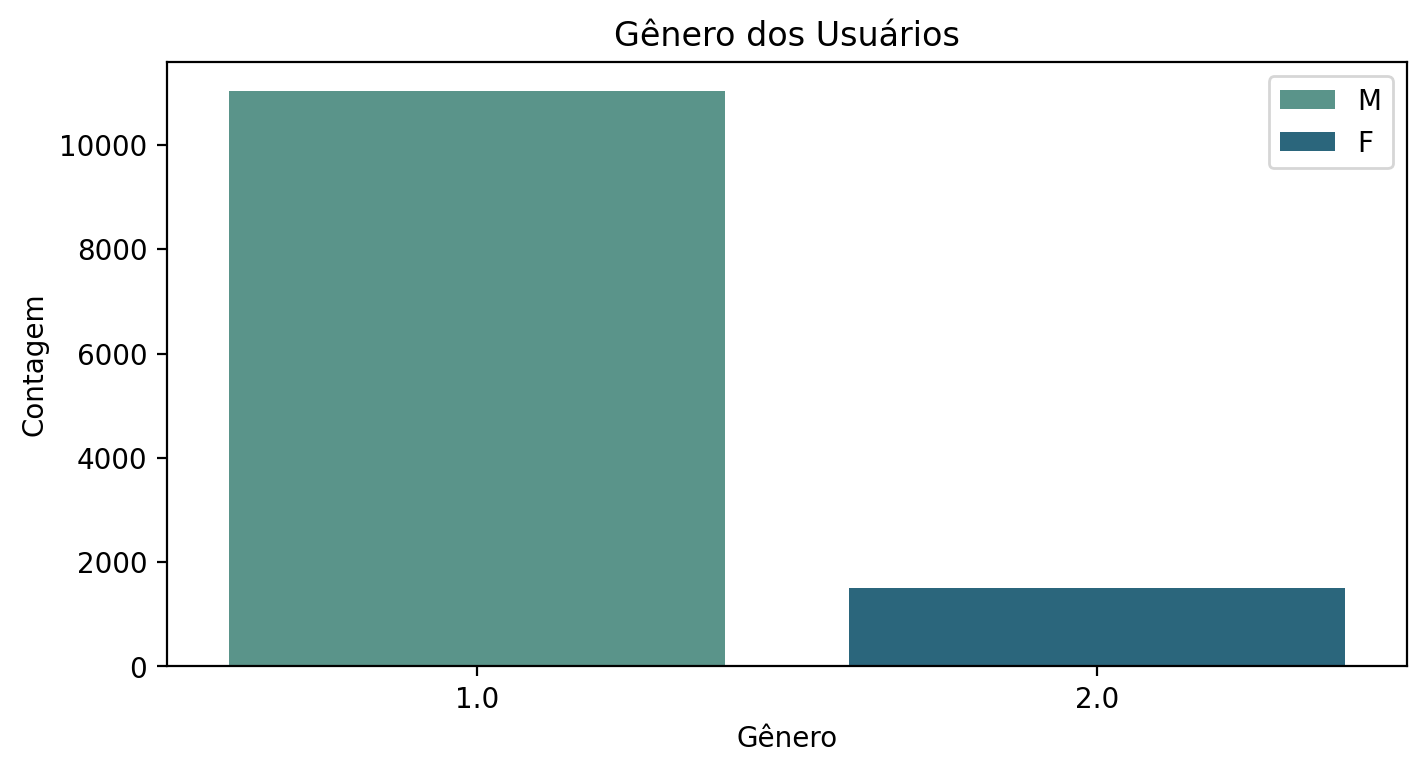

In [48]:
plt.figure(figsize=(8,4), dpi=200)

sns.countplot(x='sex', data=df, palette='crest', hue='sex', dodge=False)

plt.ylabel('Contagem')
plt.xlabel('Gênero')
plt.title('Gênero dos Usuários')
plt.legend(loc=1, labels=['M', 'F'])

plt.show()

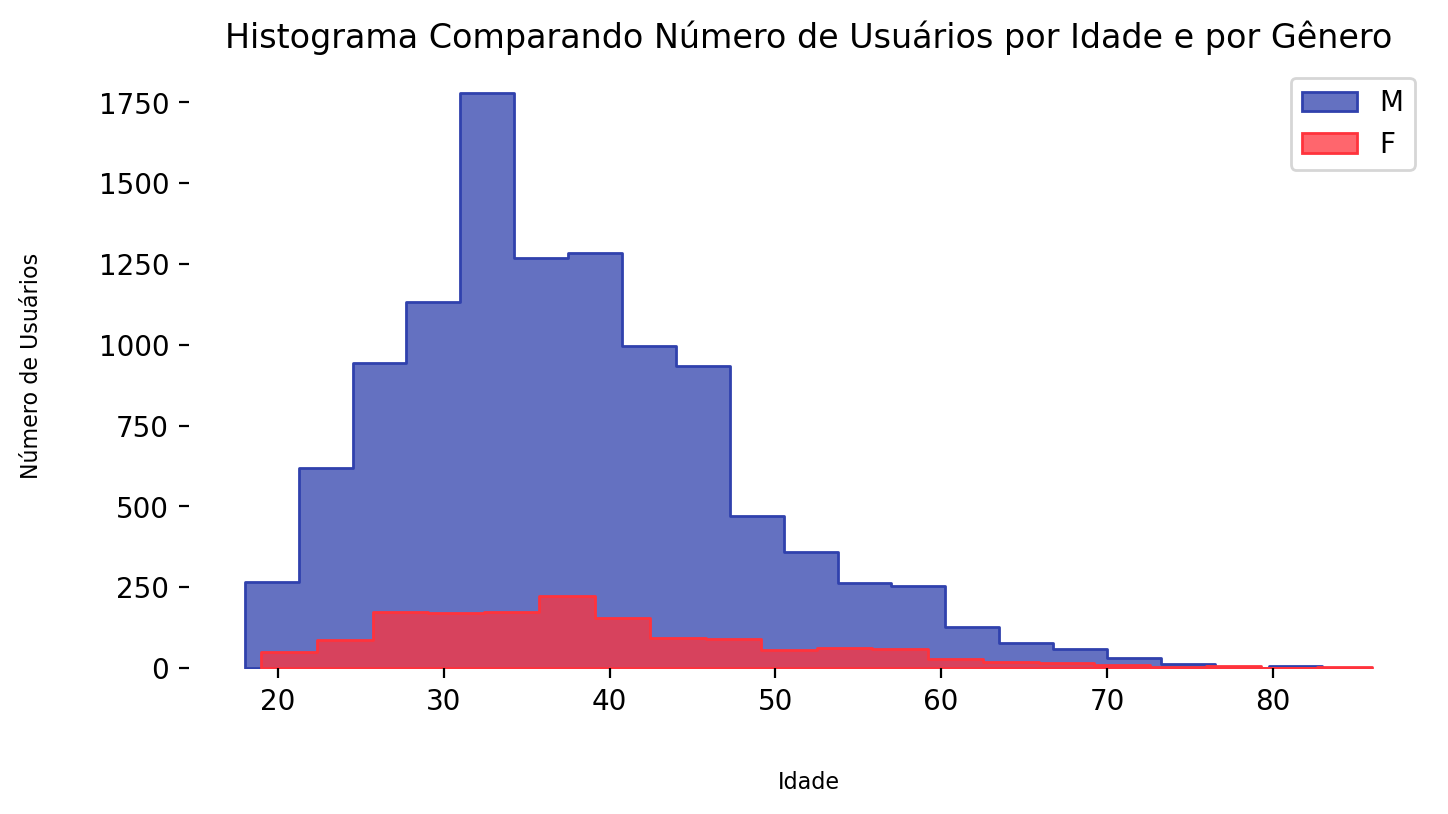

In [49]:
plt.figure(figsize=(8,4), dpi=200)

sns.histplot(df_idade[df_idade['sex'] == 1.0]['idade'], bins = 20, label = 'M', element = 'step',
             color = '#3041ad')

sns.histplot(df_idade[df_idade['sex'] == 2.0]['idade'], bins = 20, label = 'F', element = 'step',
             color = '#ff333c')
plt.title('Histograma Comparando Número de Usuários por Idade e por Gênero')
sns.despine(bottom = True, left=True)
plt.xlabel('Idade', color = 'black', labelpad = 20, fontsize = 8)
plt.ylabel('Número de Usuários', color = 'black', labelpad = 20, fontsize = 8)
plt.legend()
plt.show()

In [50]:
perfil_invest_dict = df['investor_profile'].dropna().astype(int).astype(str).value_counts().to_dict()
perfil_invest_dict

{'0': 6857, '2': 2829, '1': 1175, '3': 788, '4': 245}

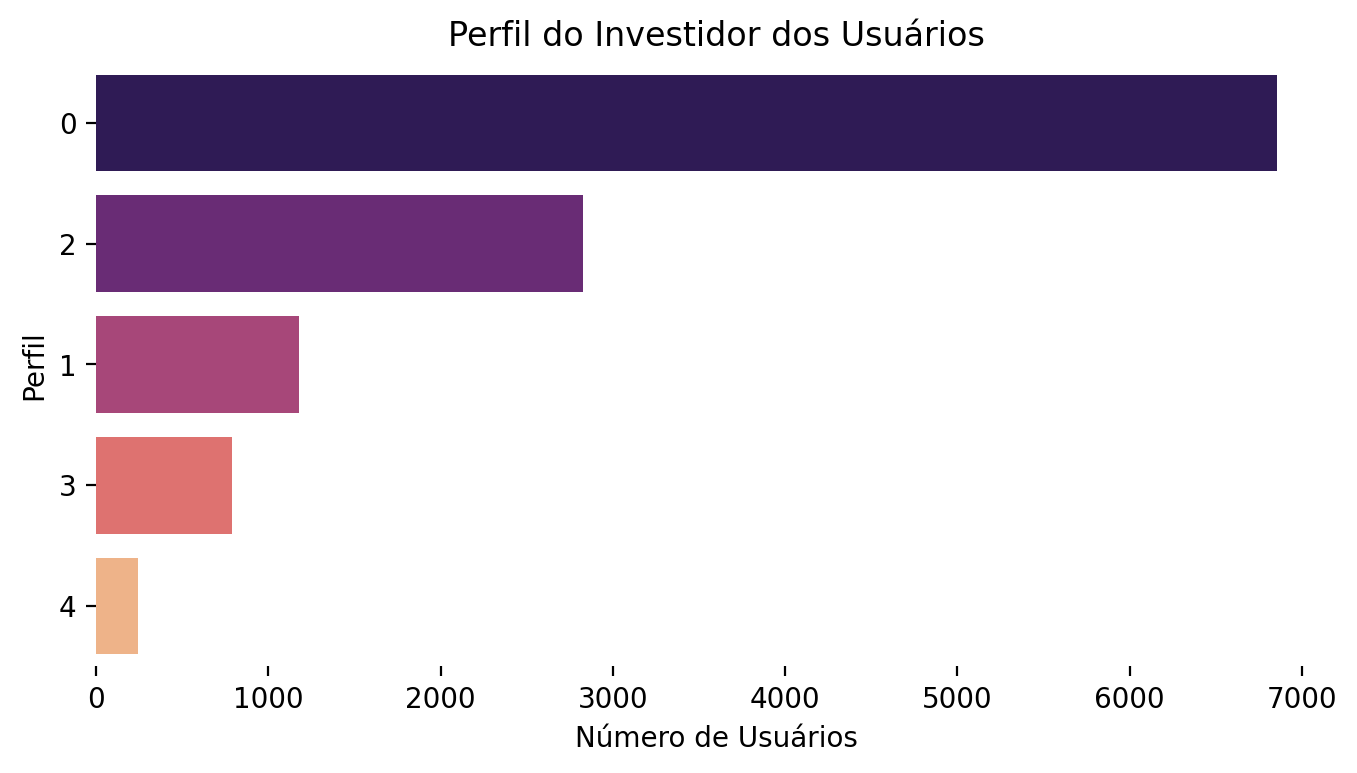

In [51]:
plt.figure(figsize=(8,4), dpi=200)
plt.xlabel('Número de Usuários')
plt.ylabel('Perfil')
plt.title('Perfil do Investidor dos Usuários')

dict_keys = list(perfil_invest_dict.keys())
dict_values = list(perfil_invest_dict.values())

sns.barplot(x=dict_values, y=dict_keys, palette='magma')
sns.despine(left=True, bottom=True)
plt.show()

In [52]:
# Trajetória de cadastros no tempo


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34722 entries, 0 to 34721
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 34722 non-null  object        
 1   birth                      12651 non-null  datetime64[ns]
 2   address_neighborhood       12713 non-null  object        
 3   address_city               12796 non-null  object        
 4   address_state              12812 non-null  object        
 5   civil_status               12884 non-null  float64       
 6   occupation                 12581 non-null  object        
 7   job_title                  15950 non-null  object        
 8   person_type                32878 non-null  object        
 9   sex                        12536 non-null  float64       
 10  investor_profile           11894 non-null  float64       
 11  news_subscription          29761 non-null  float64       
 12  newc

In [54]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')

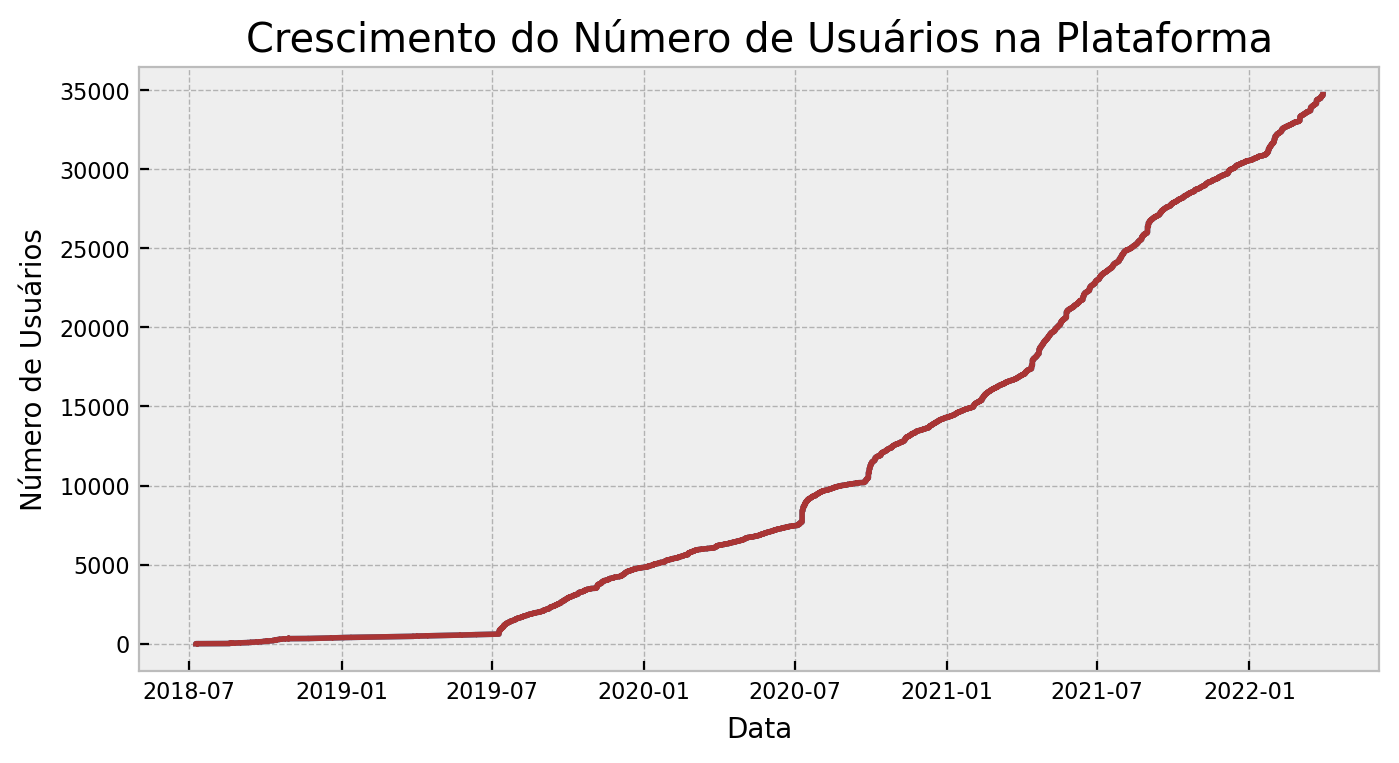

In [55]:
plt.style.use('bmh')
plt.figure(figsize=(8,4), dpi=200)
plt.plot(df['created_at'], df['created_at'].index)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlabel('Data', fontsize=10)
plt.ylabel('Número de Usuários', fontsize=10)
plt.title('Crescimento do Número de Usuários na Plataforma')
     
plt.plot(df['created_at'], df['created_at'].index, color='#a93535')

plt.show()